## Imports
Let's get started with some data!  But first, we need to import some libraries.

In [2]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## Downloading and Reading ARM's NetCDF Data
ARM's standard file format is NetCDF (network Common Data Form) which makes it very easy to work with in Python!  ARM data are available through a data portal called [Data Discovery](https://adc.arm.gov/discovery/#/) or through a webservice.  If you didn't get your username and token earlier, please go back and see the Prerequisites!

Let's download some of the MET data first!

In [3]:
# Set your username and token here!
username = 'sanielson'
token = 'xxxxxx'

# Set the datastream and start/enddates
datastream = 'bnfstampS20.b1'
startdate = '2025-03-31'
enddate = '2025-04-30T23:59:59'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result_stamp = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

# datastream = 'bnfaossmpsM1.b1'
# result_smps = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] bnfstampS20.b1.20250405.000000.nc
[DOWNLOADING] bnfstampS20.b1.20250428.000000.nc
[DOWNLOADING] bnfstampS20.b1.20250415.000000.nc
[DOWNLOADING] bnfstampS20.b1.20250430.000000.nc
[DOWNLOADING] bnfstampS20.b1.20250426.000000.nc
[DOWNLOADING] bnfstampS20.b1.20250425.000000.nc
[DOWNLOADING] bnfstampS20.b1.20250414.000000.nc
[DOWNLOADING] bnfstampS20.b1.20250402.000000.nc
[DOWNLOADING] bnfstampS20.b1.20250331.000000.nc
[DOWNLOADING] bnfstampS20.b1.20250429.000000.nc
[DOWNLOADING] bnfstampS20.b1.20250423.000000.nc
[DOWNLOADING] bnfstampS20.b1.20250410.000000.nc
[DOWNLOADING] bnfstampS20.b1.20250412.000000.nc
[DOWNLOADING] bnfstampS20.b1.20250418.000000.nc
[DOWNLOADING] bnfstampS20.b1.20250419.000000.nc
[DOWNLOADING] bnfstampS20.b1.20250407.000000.nc
[DOWNLOADING] bnfstampS20.b1.20250401.000000.nc
[DOWNLOADING] bnfstampS20.b1.20250404.000000.nc
[DOWNLOADING] bnfstampS20.b1.20250406.000000.nc
[DOWNLOADING] bnfstampS20.b1.20250427.000000.nc
[DOWNLOADING] bnfstampS20.b1.20250413.00

### Note: Did you notice the citation and DOI?

In [4]:
# Let's read in the data using ACT and check out the data
ds_stamp = act.io.read_arm_netcdf(result_stamp)
#ds_smps = act.io.read_arm_netcdf(result_smps)

ds_stamp

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


<xarray.Dataset> Size: 1MB
Dimensions:                                  (time: 1485, depth: 5)
Coordinates:
  * time                                     (time) datetime64[ns] 12kB 2025-...
  * depth                                    (depth) int32 20B 5 10 20 50 100
Data variables: (12/49)
    base_time                                (time) datetime64[ns] 12kB 2025-...
    time_offset                              (time) datetime64[ns] 12kB 2025-...
    soil_specific_water_content_west         (time, depth) float32 30kB dask.array<chunksize=(48, 5), meta=np.ndarray>
    qc_soil_specific_water_content_west      (time, depth) int32 30kB dask.array<chunksize=(48, 5), meta=np.ndarray>
    plant_water_availability_west            (time, depth) float32 30kB dask.array<chunksize=(48, 5), meta=np.ndarray>
    qc_plant_water_availability_west         (time, depth) int32 30kB dask.array<chunksize=(48, 5), meta=np.ndarray>
    ...                                       ...
    qc_real_dielectric_permittivity_east     (time, depth) int32 30kB dask.array<chunksize=(48, 5), meta=np.ndarray>
    battery_voltage                          (time) float32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    qc_battery_voltage                       (time) int32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    lat                                      (time) float32 6kB 34.65 ... 34.65
    lon                                      (time) float32 6kB -87.29 ... -8...
    alt                                      (time) float32 6kB 178.0 ... 178.0
Attributes: (12/24)
    command_line:          stamp_ingest -s bnf -f S20 --max-runtime 0
    Conventions:           ARM-1.1
    process_version:       ingest-stamp-1.2-1.el9
    dod_version:           stamp-b1-1.0
    input_source:          /data/collection/bnf/bnfstampS20.00/STAMP_Table30....
    site_id:               bnf
    ...                    ...
    qc_bit_3_assessment:   Bad
    history:               created by user armflowprod on machine prod-slurmn...
    _file_dates:           ['20250331', '20250401', '20250402', '20250403', '...
    _file_times:           ['000000', '000000', '000000', '000000', '000000',...
    _datastream:           bnfstampS20.b1
    _arm_standards_flag:   1

### Soil sensors at 1 depth

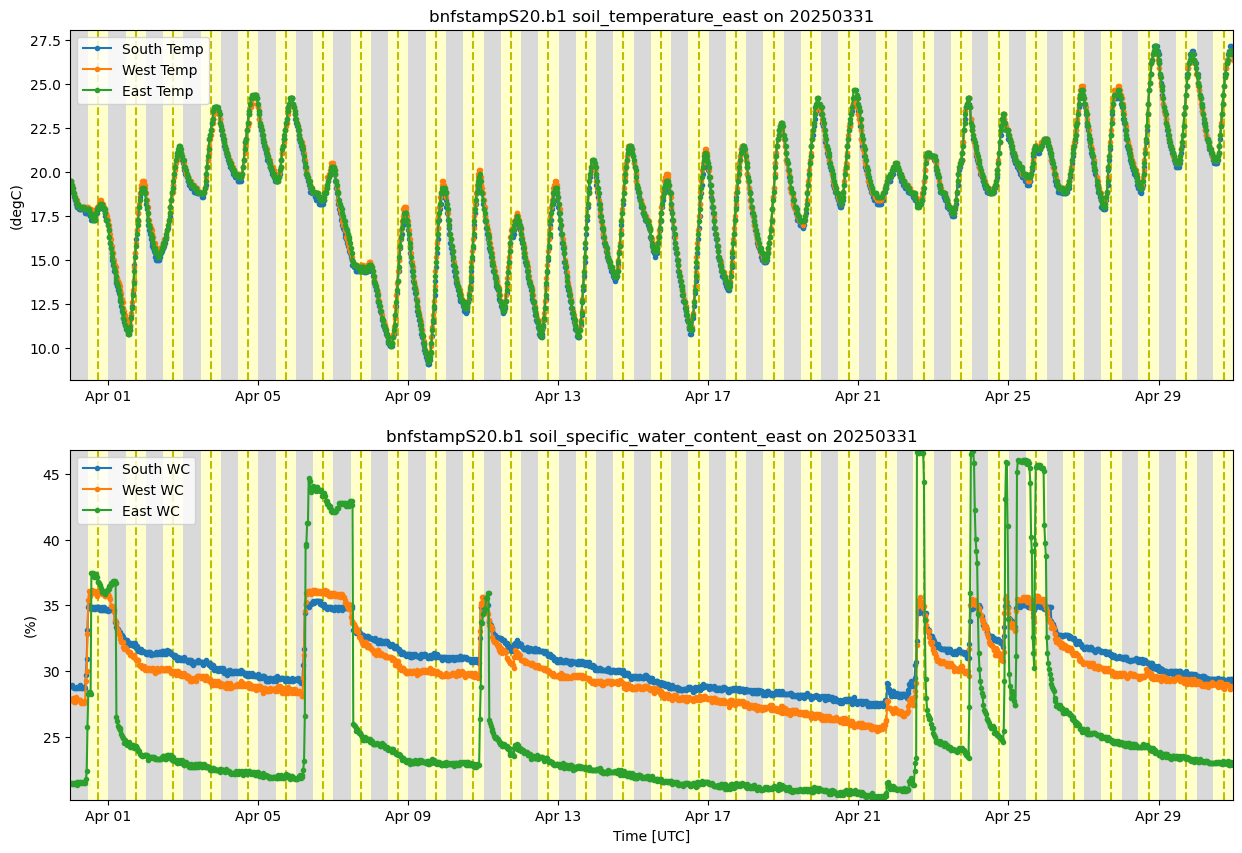

In [9]:
#this will plot each of the three soil sensors (east, west and south) at one depth 
ds_stamp.clean.cleanup()

ds1=ds_stamp.sel(depth=5)  #pick depth here

# Query the ARM DQR Webservice
south_temp = 'soil_temperature_south'
west_temp = 'soil_temperature_west'
east_temp = 'soil_temperature_east'

south_wc = 'soil_specific_water_content_south'
west_wc = 'soil_specific_water_content_west'
east_wc = 'soil_specific_water_content_east'

display = act.plotting.TimeSeriesDisplay(ds1, figsize=(15, 10), subplot_shape=(2,))

# Plot up the variable in the first plot
display.plot(south_temp, subplot_index=(0,), label='South Temp')
display.plot(west_temp, subplot_index=(0,), label='West Temp')
display.plot(east_temp, subplot_index=(0,), label='East Temp')
display.day_night_background(subplot_index=(0,))
display.axes[0].legend()

display.plot(south_wc, subplot_index=(1,), label='South WC')
display.plot(west_wc, subplot_index=(1,), label='West WC')
display.plot(east_wc, subplot_index=(1,), label='East WC')
display.day_night_background(subplot_index=(1,))
display.axes[1].legend()

plt.show()

### One Sensor at 5 Depths

<Axes: title={'center': 'STAMP soil_temperature_south on 20250331'}, xlabel='Time [UTC]', ylabel='(degC)'>

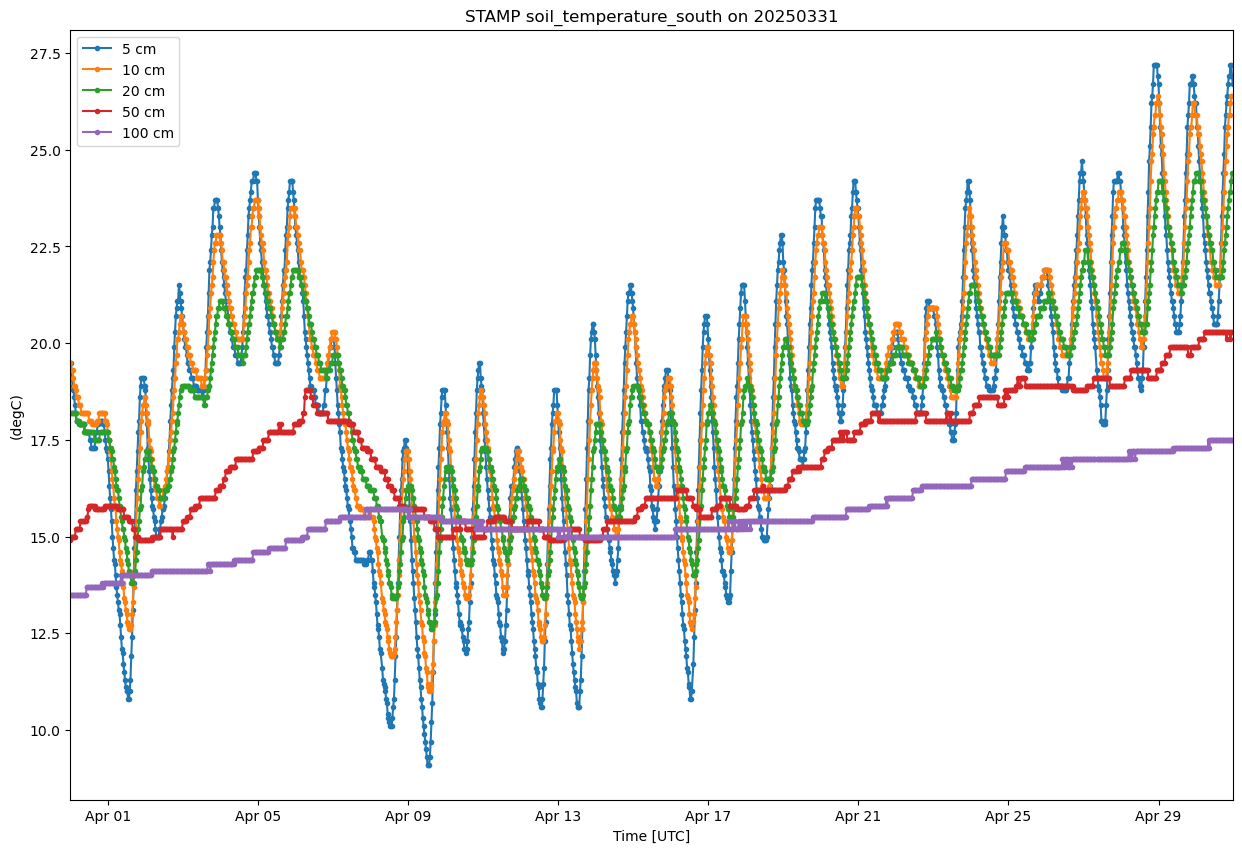

In [6]:
#this will plot one sensor (east, west or south) for all 5 depths for the time range

display = act.plotting.TimeSeriesDisplay({'STAMP': ds_stamp}, figsize=(15, 10), subplot_shape=(1,))
display.plot('soil_temperature_south', dsname='STAMP', subplot_index=(0,), force_line_plot=True, labels = True)